In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
dataset = pd.read_csv('/content/Algerian_forest_fires_dataset.csv',header = 0)

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [ ]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
dataset.isnull().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


so here basically two regions are indicated lets first seperate them with new column where 0 indicates the first one and 1 indicates the second one

In [44]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df = dataset

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [45]:
df[['Region']]=df[['Region']].astype(int)

In [ ]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [ ]:
df.isnull().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [46]:
df = df.dropna().reset_index(drop=True)

In [47]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [48]:
df.iloc[[122]]
# here in this row we have again the column name in so we need to remove it

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [49]:
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [50]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Here so space is in the column name so we need to remove those space at beginnig and end for each of the column

In [51]:
df.columns = df.columns.str.strip()

In [52]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


Here all the dataType is object so we need to change the dataType to the required data type like for day we need it in int and so on

In [54]:
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [57]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [59]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [60]:
df.to_csv('AlgerianForestFireCleanedDatasSet.csv',index=False)

**EDA PART**

In [61]:
df_copy = df.drop(['day','month','year'],axis=1)

In [62]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [63]:
df_copy['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [64]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [65]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [66]:
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


<ipython-input-40-cd6d66812410>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


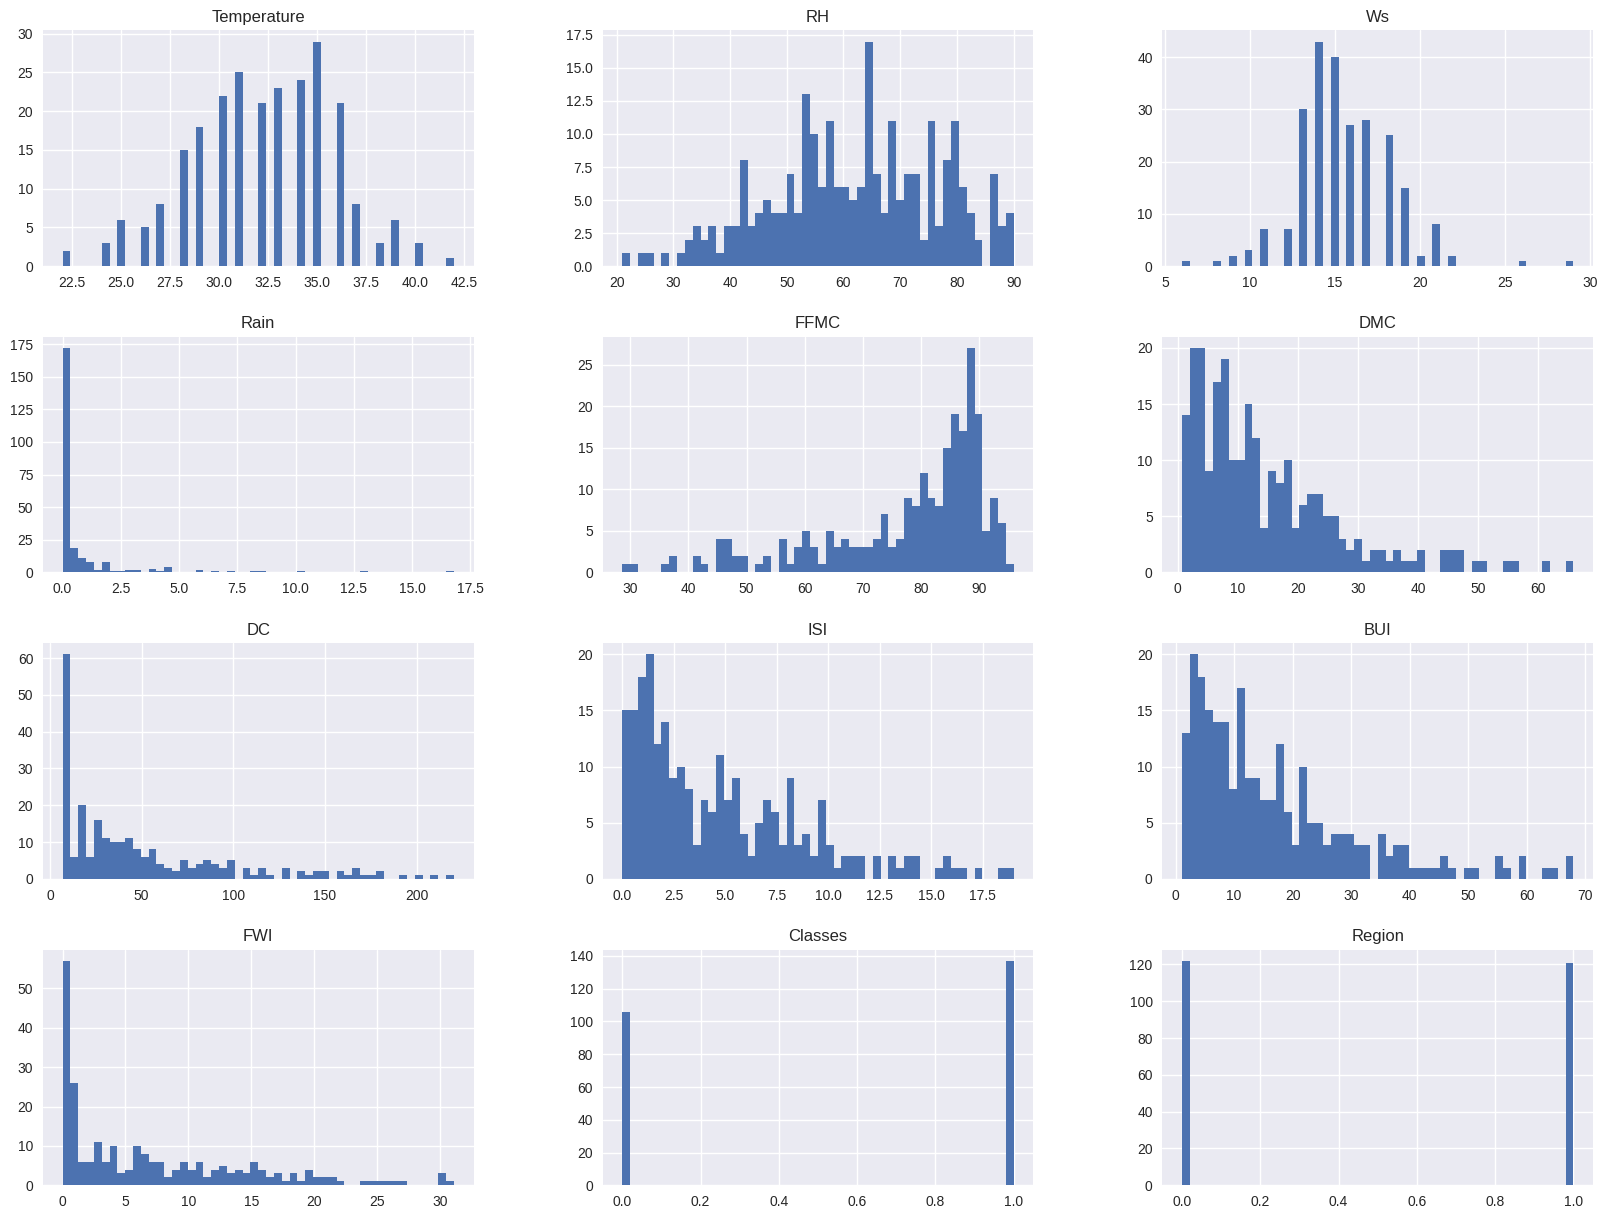

In [ ]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
df_copy.to_csv('AlgerianForestFireEDADataSet.csv',index=False)

Dividing data into dep and indep

In [67]:
X= df_copy.drop('FWI',axis=1)

In [68]:
y=df_copy['FWI']

In [69]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [70]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


Now dividing into train and test

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [74]:
X_train.shape,y_train.shape,X_test.shape

((182, 11), (182,), (61, 11))

**FEATURE SELECTION BASED ON CORRELATION**

Basically it mean when two of the independent features are highly correlated then we can take one of them and drop one.
When two features are highly correlated then both of them increase or decrease with the same rate and both have almost same feature in such case removing one of them will not effect the overall of the output thus we can use this concept of multicolinearity for feature selection

<Axes: >

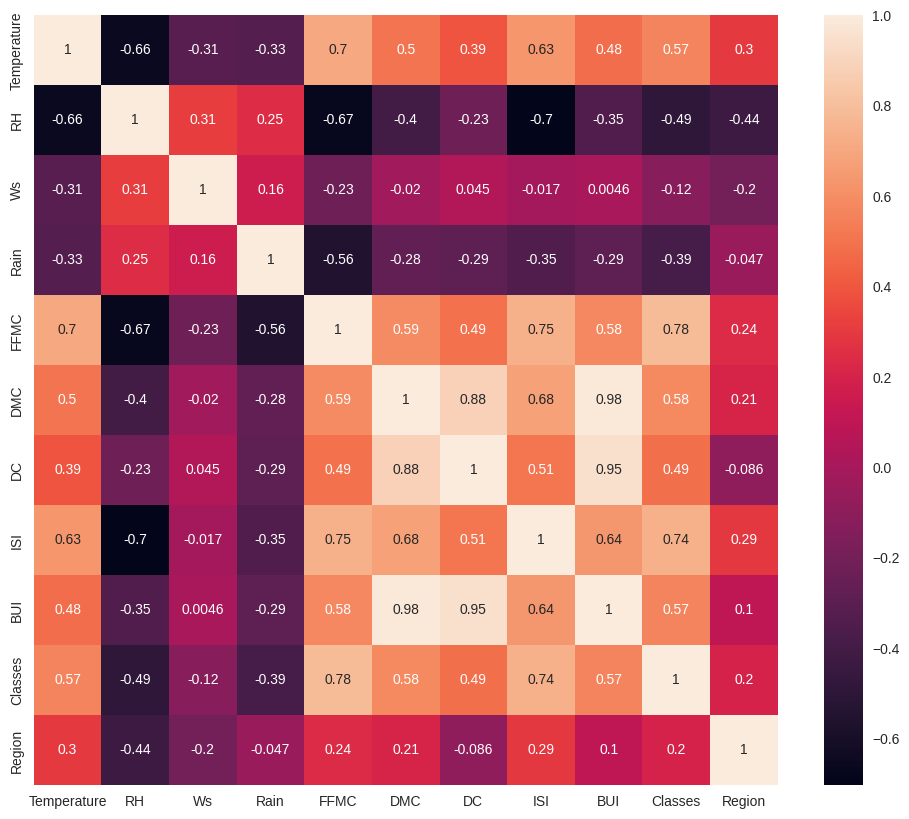

In [76]:
#lets check for the multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [77]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.659120,-0.313004,-0.329720,0.701060,0.502747,0.393587,0.630473,0.476795,0.565026,0.299316
RH,-0.659120,1.000000,0.312190,0.245762,-0.670875,-0.399709,-0.227840,-0.703401,-0.346836,-0.491651,-0.435075
Ws,-0.313004,0.312190,1.000000,0.160958,-0.227260,-0.019928,0.045396,-0.017229,0.004554,-0.120561,-0.198738
Rain,-0.329720,0.245762,0.160958,1.000000,-0.555931,-0.275293,-0.287197,-0.348926,-0.285114,-0.390323,-0.046784
FFMC,0.701060,-0.670875,-0.227260,-0.555931,1.000000,0.592479,0.493368,0.746844,0.575405,0.782283,0.237565
DMC,0.502747,-0.399709,-0.019928,-0.275293,0.592479,1.000000,0.882414,0.679640,0.984318,0.583017,0.205296
DC,0.393587,-0.227840,0.045396,-0.287197,0.493368,0.882414,1.000000,0.513896,0.949592,0.485008,-0.085764
ISI,0.630473,-0.703401,-0.017229,-0.348926,0.746844,0.679640,0.513896,1.000000,0.637470,0.742329,0.288159
BUI,0.476795,-0.346836,0.004554,-0.285114,0.575405,0.984318,0.949592,0.637470,1.000000,0.567145,0.100737
Classes,0.565026,-0.491651,-0.120561,-0.390323,0.782283,0.583017,0.485008,0.742329,0.567145,1.000000,0.200545


In [ ]:
# here we can see some of them have even more than 0.9 corr

In [78]:
# function to find the columns who are correleted with more than given threshold

def correlation(dataset , threshold):
  col_cor = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i,j])>threshold):
        colName = corr_matrix.columns[i]
        col_cor.add(colName)
  return col_cor


In [79]:
corr_features = correlation(X_train,0.85)

In [80]:
corr_features

{'BUI', 'DC'}

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

In [85]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

**FEATURE SCALING OR STANDARIZATION**

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
X_train_scaled

array([[ 1.02303642, -0.43660011,  0.86738718, ...,  1.21490928,
         0.84674738, -1.        ],
       [-0.87412283,  1.29836103, -0.48477099, ..., -1.11490029,
        -1.18098977,  1.        ],
       [ 0.48099092, -0.22840477,  0.86738718, ...,  0.75380114,
         0.84674738,  1.        ],
       ...,
       [ 0.20996817,  0.25738434, -0.14673145, ..., -0.50817904,
         0.84674738, -1.        ],
       [ 0.48099092,  0.53497813, -0.82281053, ..., -0.21695285,
         0.84674738, -1.        ],
       [-0.06105458, -0.08960788,  0.86738718, ..., -0.65379214,
        -1.18098977, -1.        ]])

BOX PLOTS FOR UNDERSTANDING EFFECT OF THE STANDARDSCALING

<ipython-input-87-7f24c36870a6>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'after scaling')

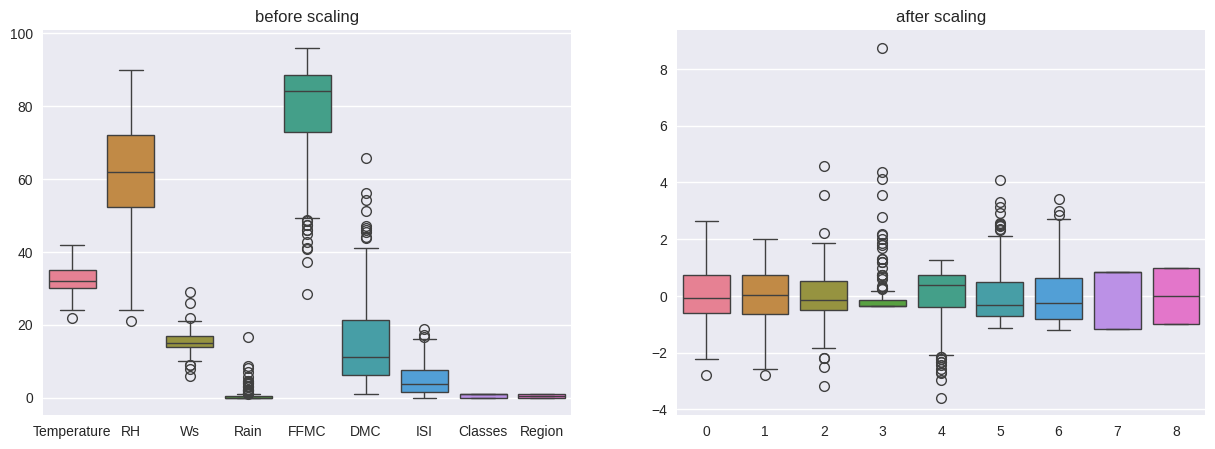

In [87]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("after scaling")

**LINEAR REGRESSION MODEL**

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linearRegressor = LinearRegression()
linearRegressor.fit(X_train_scaled,y_train)
y_predict = linearRegressor.predict(X_test_scaled)
mea = mean_absolute_error(y_test,y_predict)
score = r2_score(y_test,y_predict)
print("mea:",mea)
print("r2_score:",score)

mea: 0.7080454340692296
r2_score: 0.9813991246626835


LASSO REGRESSION

In [90]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassoReg = Lasso()
lassoReg.fit(X_train_scaled,y_train)
y_predict = lassoReg.predict(X_test_scaled)
mea = mean_absolute_error(y_test,y_predict)
score = r2_score(y_test,y_predict)
print("mea:",mea)
print("r2_score:",score)

mea: 1.1626665590574765
r2_score: 0.9524019216349232


RIDGE REGRESSION

In [94]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgeReg = Ridge()
ridgeReg.fit(X_train_scaled,y_train)
y_predict = ridgeReg.predict(X_test_scaled)
mea = mean_absolute_error(y_test,y_predict)
score = r2_score(y_test,y_predict)
print("mea:",mea)
print("r2_score:",score)

mea: 0.7285821514895964
r2_score: 0.9807982726897481


ELASTICENET REGRESSION MODEL

In [95]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled,y_train)
y_predict = elasticNet.predict(X_test_scaled)
mea = mean_absolute_error(y_test,y_predict)
score = r2_score(y_test,y_predict)
print("mea:",mea)
print("r2_score:",score)

mea: 1.7839900020995938
r2_score: 0.8868096501682265


NOW PICKLING

In [96]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(linearRegressor,open('linearRegression.pkl','wb'))